# Data loading and initial cleaning

## data loading 

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
predict =  pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

train_original = train.copy()
predict_original = predict.copy()

In [6]:
train.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [8]:
predict.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


## check with missing values

In [11]:
train.info() # it does contain mssing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
predict.info()  # contain missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


## filling in: 1. with mean, mode, median:

In [33]:
print(train.isnull().sum())
print(train.isnull().values.sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
149


In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [28]:
train = train.replace(' ', np.NaN)

In [ ]:
for col in train.columns:
    if train[col].dtypes == 'object':
        train[col] = train[col].fillna(train[col].value_counts().index[0], inplace=True) # train[col].mode()[0]
    elif train[col].dtypes == 'float'and col != 'LoanAmount':
        train[col] = train[col].fillna(train[col].mode()[0], inplace=True)
    elif col == 'LoanAmount':
        train[col] = train[col].fillna(train[col].median(), inplace = True)
train.info()

In [35]:
print(predict.isnull().sum())
print(predict.isnull().values.sum())

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64
84


In [39]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
predict = predict.replace(' ', np.NaN)

In [ ]:
for col in predict.columns:
    if predict[col].dtypes == 'object':
        predict[col] = predict[col].fillna(predict[col].mode()[0], inplace=True) 
    elif predict[col].dtypes == 'float'and col != 'LoanAmount':
        train[col] = predict[col].fillna(predict[col].mode()[0], inplace=True)
    elif col == 'LoanAmount':
        predict[col] = predict[col].fillna(predict[col].median(), inplace = True)
predict.info()

## filling in: 2. with the value that was predicted by KNNImputer:

In [54]:
# drop the ID column first (to prevent the impact of non-informative columns):
train = train.drop(columns=['Loan_ID'])
# transform the categorical value into numerical value using one hot encoding:
train = pd.get_dummies(train)
# fill the missing value by using KNNImputer
from sklearn.impute import KNNImputer
def imputation(x):
    imputer = KNNImputer(n_neighbors=2, missing_values=np.NaN)
    return imputer.fit_transform(x) # after transform() the result will be returned as an array
train_array = imputation(train)
train_imputed = pd.DataFrame(train_array, columns=train.columns)
train_imputed.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849.0,0.0,141.0,360.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3000.0,0.0,66.0,360.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [66]:
train_imputed.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_N              0
Loan_Status_Y              0
dtype: int64

In [64]:
predict = predict.drop(columns=['Loan_ID'])
predict = pd.get_dummies(predict)
predict_array = imputation(predict)
predict_imputed = pd.DataFrame(predict_array, columns=predict.columns)
predict_imputed.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720.0,0.0,110.0,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,3076.0,1500.0,126.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,5000.0,1800.0,208.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [68]:
predict_imputed.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

# EDA

(array([0, 1]), [Text(0, 0, 'Loan_Status_Y'), Text(1, 0, 'Loan_Status_N')])

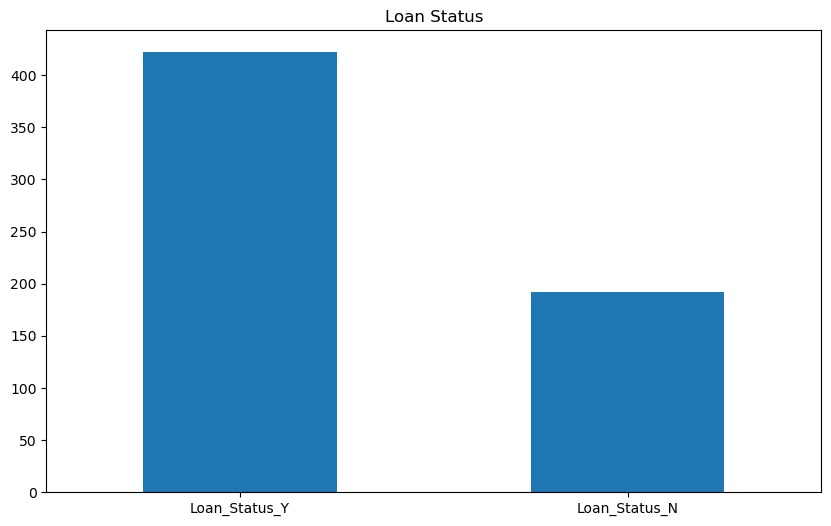

In [93]:
# here we use sum() instead of value_counts()
train_imputed[['Loan_Status_Y', 'Loan_Status_N']].sum().plot.bar(figsize=(10,6), title='Loan Status')
plt.xticks(rotation=0)

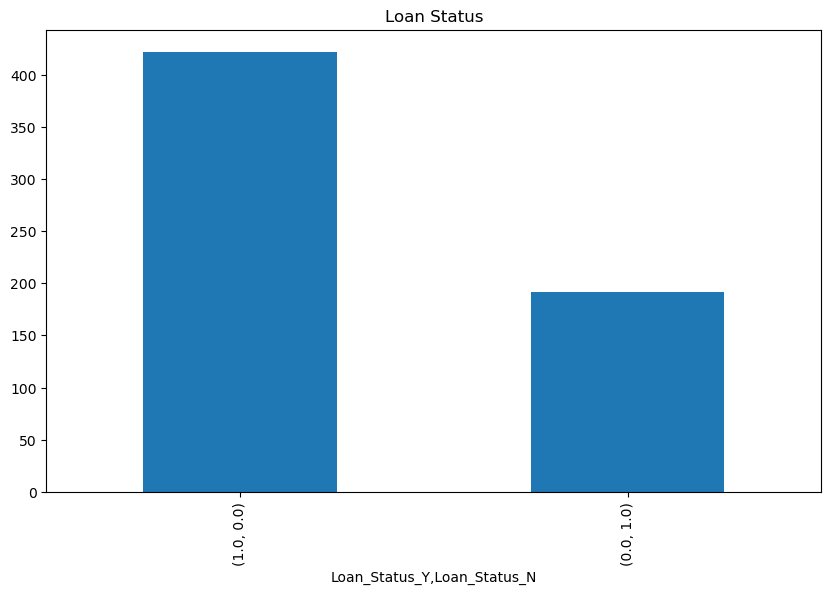

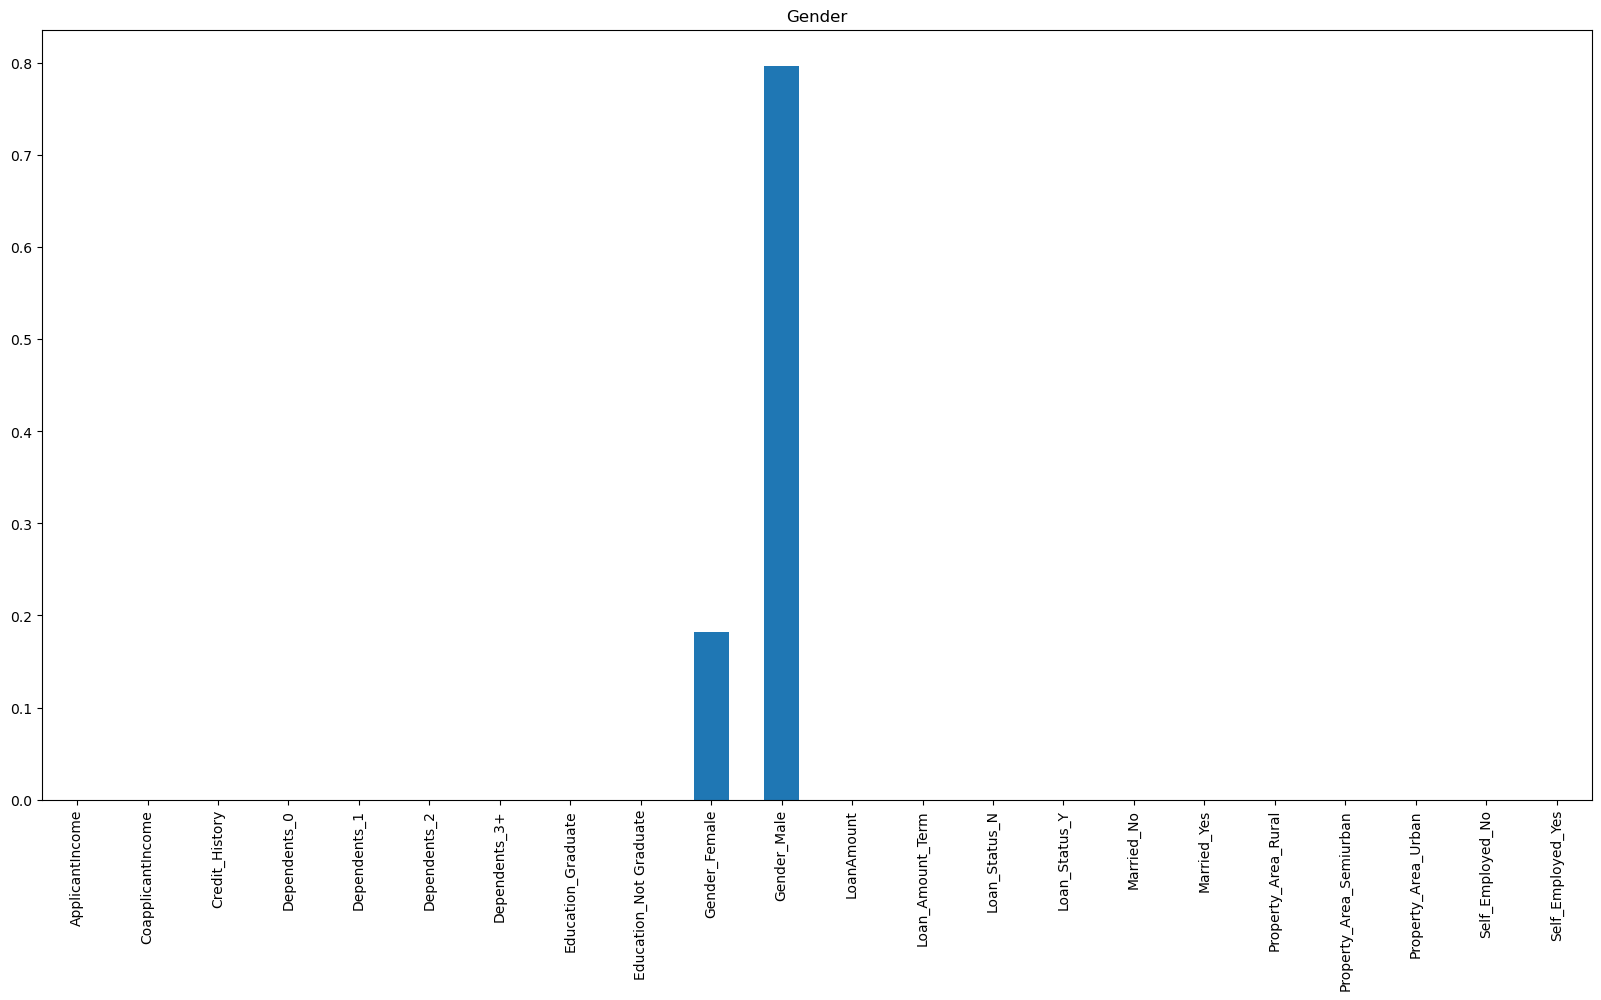

In [153]:
# why do we choose sum() over value_counts(), and why do we choose len() over counts() below:
# the fuction is not giving us exactly what we want:
train_imputed[['Loan_Status_Y', 'Loan_Status_N']].value_counts().plot.bar(figsize=(10,6), title='Loan Status')
plt.show()
(train_imputed[['Gender_Female', 'Gender_Male']].sum()/train_imputed.count()).plot.bar(figsize=(20,10), title='Gender')
plt.show()

(array([0, 1, 2]), [Text(0, 0, '1.0'), Text(1, 0, '0.0'), Text(2, 0, '0.5')])

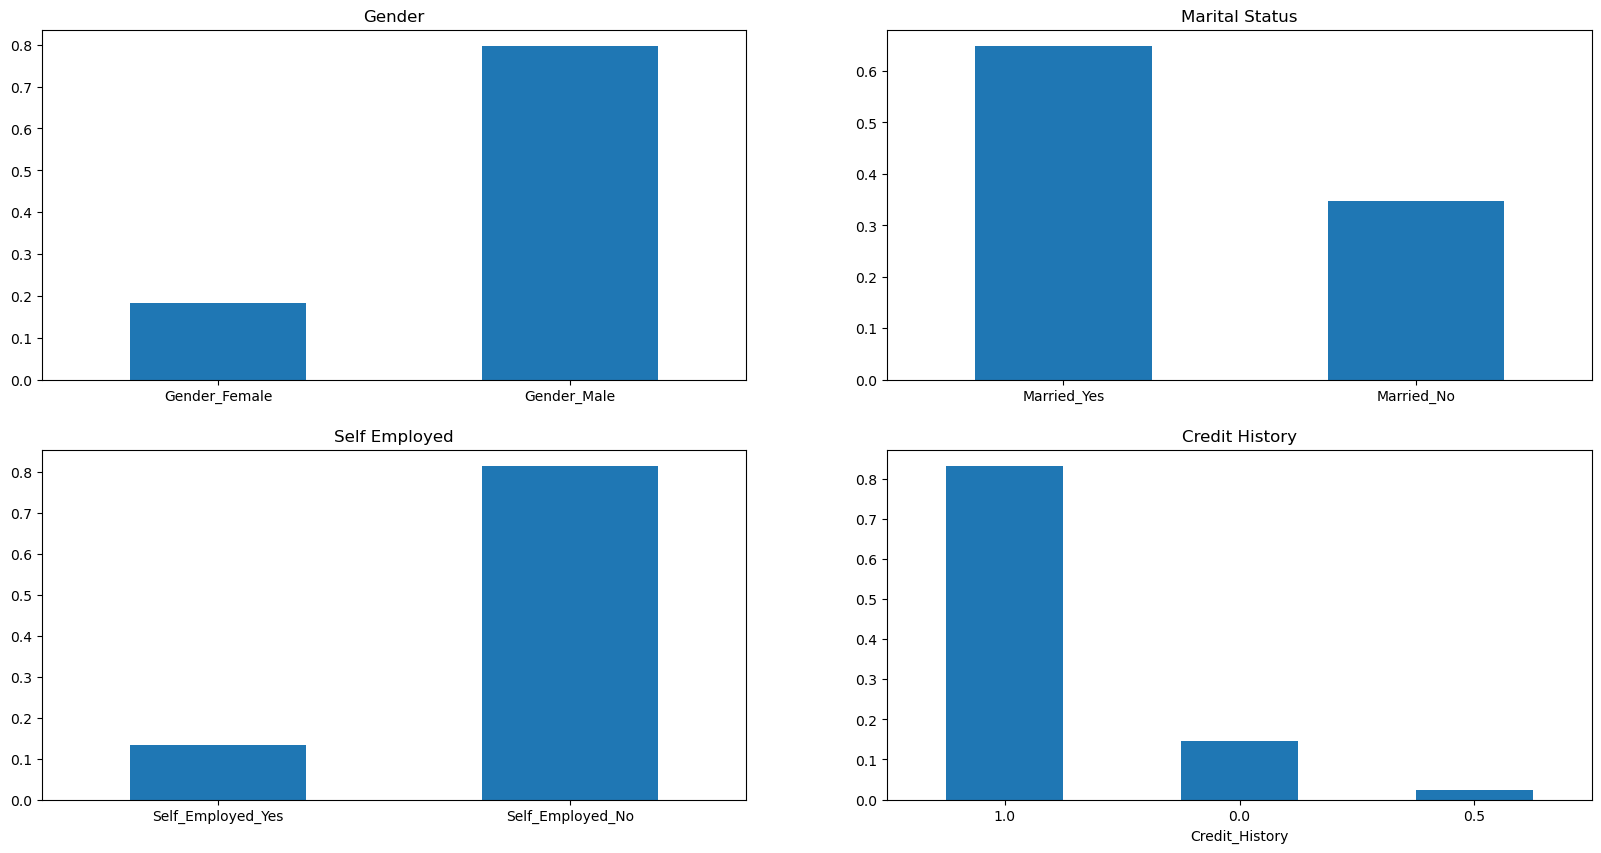

In [121]:
plt.figure(1) # set a huge big canvas 
plt.subplot(221) # the big canvas will constitute a 2x2 layout (with 4 sub graph), 221 is editing the first graph
(train_imputed[['Gender_Female', 'Gender_Male']].sum()/len(train_imputed)).plot.bar(figsize=(20,10), title='Gender')
# here we use len() instead of count()
plt.xticks(rotation=0)
plt.subplot(222)
(train_imputed[['Married_Yes', 'Married_No']].sum()/len(train_imputed)).plot.bar(figsize=(20,10), title='Marital Status')
plt.xticks(rotation=0)
plt.subplot(223)
(train_imputed[['Self_Employed_Yes', 'Self_Employed_No']].sum()/len(train_imputed)).plot.bar(figsize=(20,10), title='Self Employed')
plt.xticks(rotation=0)
plt.subplot(224)
train_imputed['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Credit History')
plt.xticks(rotation=0) # 0.5 in credit history: filled result predicted by machine learning

(array([0, 1, 2]),
 [Text(0, 0, 'Property_Area_Rural'),
  Text(1, 0, 'Property_Area_Semiurban'),
  Text(2, 0, 'Property_Area_Urban')])

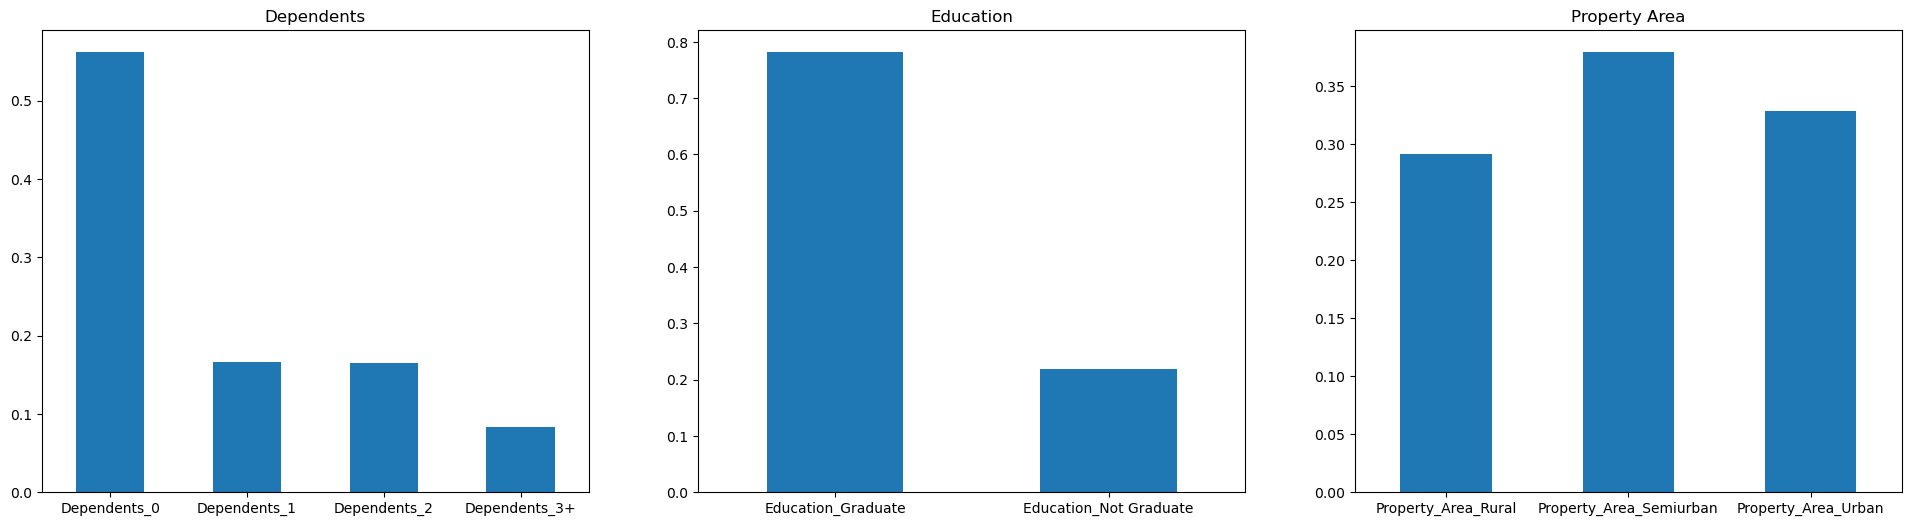

In [135]:
plt.figure(1)
plt.subplot(131)
(train_imputed[['Dependents_0', 'Dependents_1','Dependents_2','Dependents_3+']].sum()/len(train_imputed)).plot.bar(figsize=(24,6), title='Dependents')
plt.xticks(rotation=0)
plt.subplot(132)
(train_imputed[['Education_Graduate', 'Education_Not Graduate']].sum()/len(train_imputed)).plot.bar(figsize=(24,6), title='Education')
plt.xticks(rotation=0)
plt.subplot(133)
(train_imputed[['Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban']].sum()/len(train_imputed)).plot.bar(figsize=(24,6), title='Property Area')
plt.xticks(rotation=0)

C:\Users\yuche\AppData\Local\Temp\ipykernel_28752\950817484.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_imputed['ApplicantIncome'])


<Axes: >

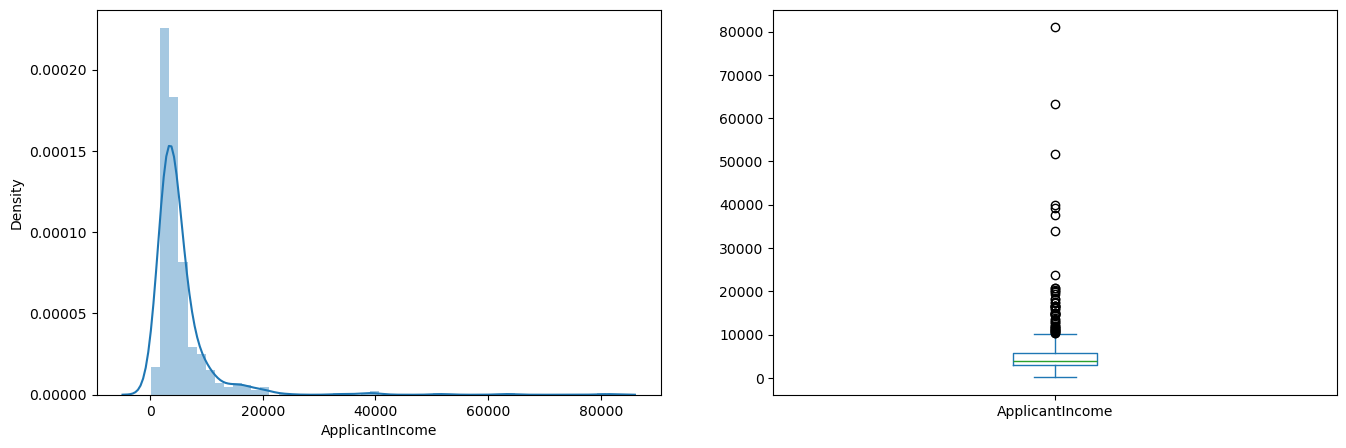

In [137]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_imputed['ApplicantIncome'])
plt.subplot(122)
train_imputed['ApplicantIncome'].plot.box(figsize=(16,5))

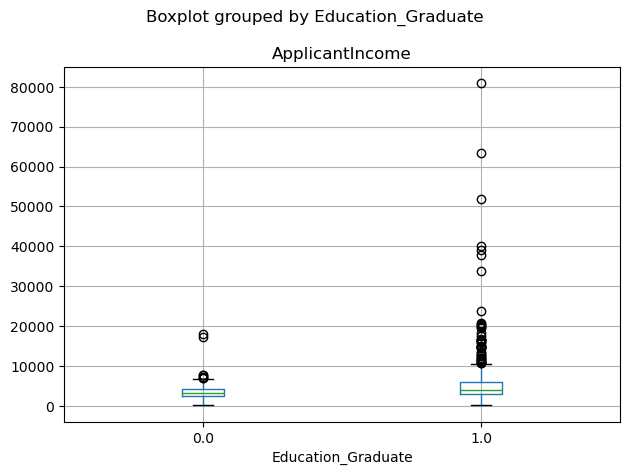

In [163]:
train_imputed.boxplot(column = 'ApplicantIncome', by='Education_Graduate')
plt.tight_layout()

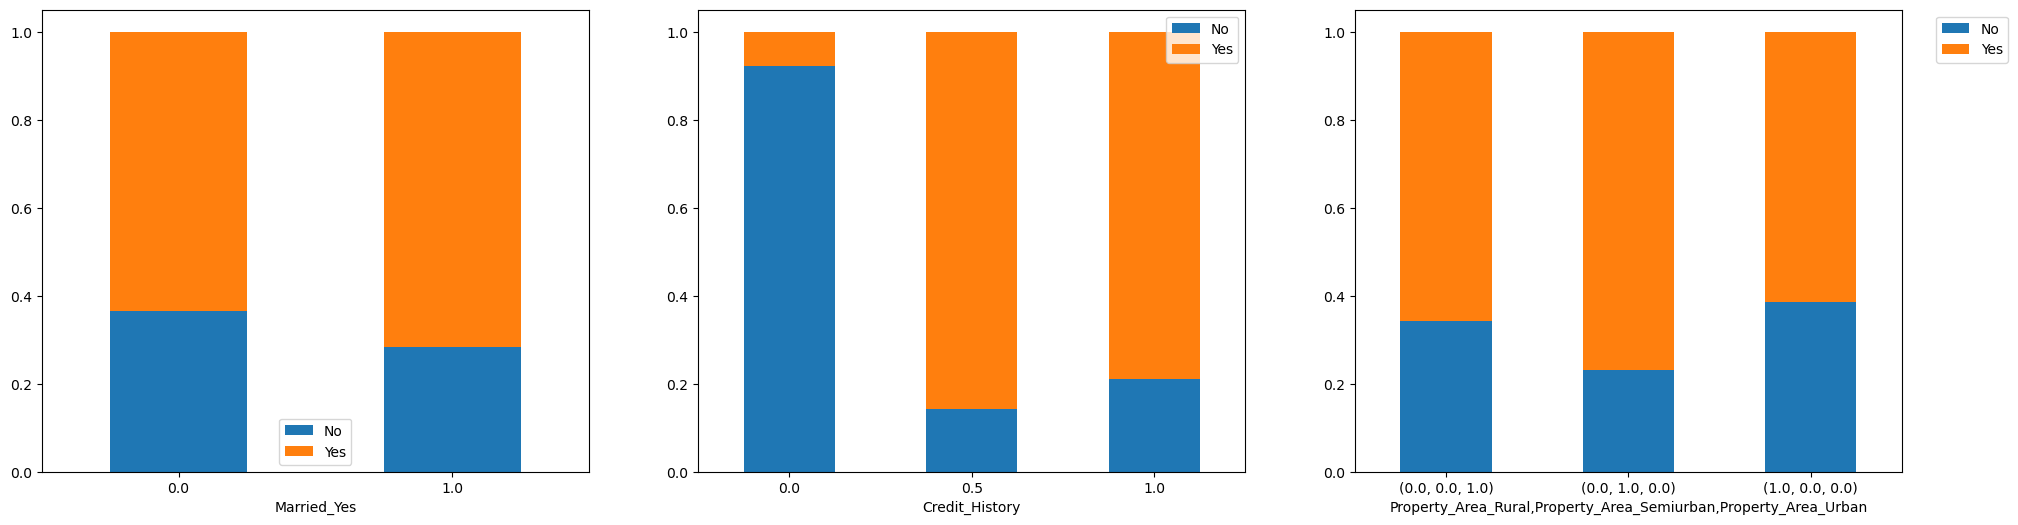

In [213]:
plt.figure(1, figsize=(24,6))
plt.subplot(131)
Married = pd.crosstab(train_imputed['Married_Yes'], train_imputed['Loan_Status_Y'])
ax1 = plt.gca() 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax1)
plt.xticks(rotation=0)
plt.legend(['No', 'Yes'], loc='best')

plt.subplot(132)
credit_hist = pd.crosstab(train_imputed['Credit_History'], train_imputed['Loan_Status_Y'])
ax2 = plt.gca() 
credit_hist.div(credit_hist.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax2)
plt.xticks(rotation=0)
plt.legend(['No', 'Yes'], loc='best')

# using multi-index in crosstab(): index=[df['col1'],df['col2']...]
plt.subplot(133)
area = pd.crosstab(index=[train_imputed['Property_Area_Rural'], train_imputed['Property_Area_Semiurban'],train_imputed['Property_Area_Urban']], columns= train_imputed['Loan_Status_Y'])
ax3 = plt.gca() 
area.div(area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax3)
plt.xticks(rotation=0)
plt.legend(['No','Yes'], bbox_to_anchor=(1.05, 1.0), loc='best')

In [217]:
train_imputed['Total_Income'] = train_imputed['ApplicantIncome'] + train_imputed['CoapplicantIncome']
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
train_imputed['Total_Income_bin'] = pd.cut(train_imputed['Total_Income'], bins, labels=group)
train_imputed

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y,Total_Income,Total_Income_bin
0,5849.0,0.0,141.0,360.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,5849.0,High
1,4583.0,1508.0,128.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,6091.0,Very High
2,3000.0,0.0,66.0,360.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3000.0,Average
3,2583.0,2358.0,120.0,360.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,4941.0,High
4,6000.0,0.0,141.0,360.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,6000.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2900.0,Average
610,4106.0,0.0,40.0,180.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,4106.0,High
611,8072.0,240.0,253.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,8312.0,Very High
612,7583.0,0.0,187.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,7583.0,Very High


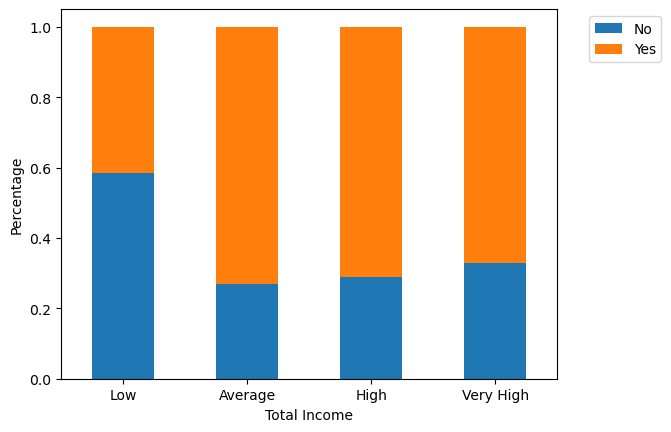

In [223]:
Total_Income_bin = pd.crosstab(train_imputed['Total_Income_bin'], train_imputed['Loan_Status_Y'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Total Income')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(['No','Yes'], bbox_to_anchor=(1.05, 1.0), loc='best')

In [233]:
train_imputed['Total_Income_bin'].replace({'Low':1, 'Average':2, 'High':3, 'Very High':4}, inplace=True)

C:\Users\yuche\AppData\Local\Temp\ipykernel_28752\2586954078.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_imputed['Total_Income_bin'].replace({'Low':1, 'Average':2, 'High':3, 'Very High':4}, inplace=True)
C:\Users\yuche\AppData\Local\Temp\ipykernel_28752\2586954078.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no

<Axes: >

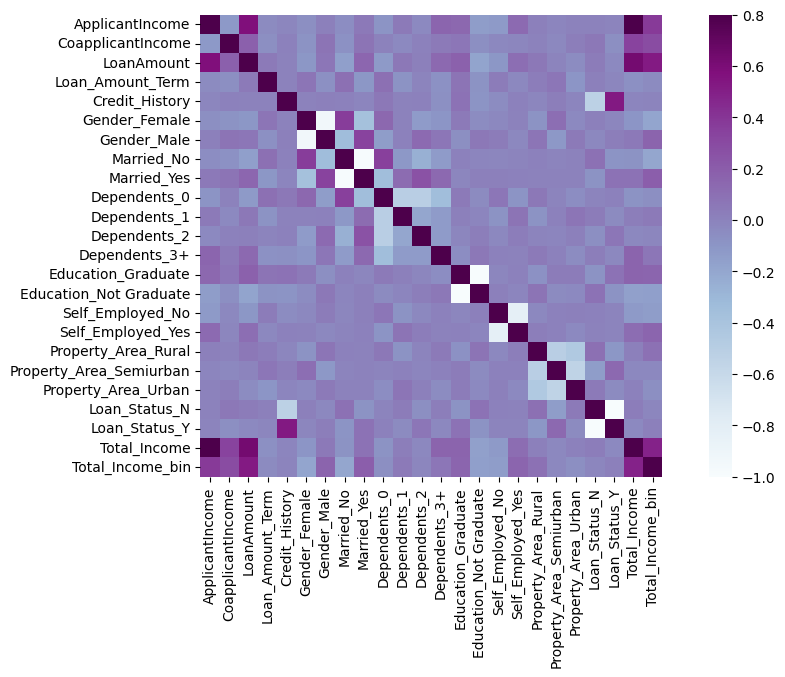

In [235]:
plt.figure(figsize=(12,6))
sns.heatmap(train_imputed.corr(), vmax=0.8, square=True, cmap='BuPu')

# Feature selection and model selection

In [241]:
# selected attributes: Loan Status
# putting attributes:
x = train_imputed.drop(['Loan_Status_Y', 'Loan_Status_N'], axis=1) # remove the Loan_status from the df, as loan_status-Y is the thing we want to predict
y = train_imputed[['Loan_Status_Y', 'Loan_Status_N']] # y is the corresponding dependent variable

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=4)
x_train.shape, x_test.shape

((429, 22), (185, 22))

## Decision Tree

In [253]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
model_1 = DecisionTreeClassifier(random_state=1)
model_1.fit(x_train, y_train)
prediction_1 = model_1.predict(x_test)
accuracy_1 = accuracy_score(y_test, prediction_1)
print(classification_report(y_test, prediction_1))
print(accuracy_score(y_test, prediction_1))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       124
           1       0.64      0.57      0.60        61

   micro avg       0.75      0.75      0.75       185
   macro avg       0.72      0.71      0.71       185
weighted avg       0.75      0.75      0.75       185
 samples avg       0.75      0.75      0.75       185

0.7513513513513513


## Random Forest

In [259]:
from sklearn.ensemble import RandomForestClassifier

def learning(x_tra,y_tra,x_tes, y_tes,model):
    model.fit(x_tra, y_tra)
    prediction = model.predict(x_tes)
    accuracy = accuracy_score(y_tes, prediction)
    return print(classification_report(y_test, prediction)), print(accuracy_score(y_test, prediction))

rfc_report=learning(x_train, y_train, x_test, y_test, RandomForestClassifier(n_estimators=500))
print(rfc_report)

              precision    recall  f1-score   support

           0       0.77      0.94      0.85       124
           1       0.79      0.43      0.55        61

   micro avg       0.77      0.77      0.77       185
   macro avg       0.78      0.68      0.70       185
weighted avg       0.78      0.77      0.75       185
 samples avg       0.77      0.77      0.77       185

0.772972972972973
(None, None)


## Logistic Regression x

In [316]:
from sklearn.linear_model import LogisticRegression
lgr_report=learning(x_train, y_train, x_test, y_test, LogisticRegression(random_state=42))
print(lgr_report)

ValueError: y should be a 1d array, got an array of shape (429, 2) instead.

## K-Nearest Neighbors (KNN)

In [289]:
from sklearn.neighbors import KNeighborsClassifier
knn_report=learning(x_train, y_train, x_test, y_test, KNeighborsClassifier(leaf_size=50))
print(knn_report)

              precision    recall  f1-score   support

           0       0.69      0.80      0.74       124
           1       0.40      0.28      0.33        61

   micro avg       0.63      0.63      0.63       185
   macro avg       0.55      0.54      0.54       185
weighted avg       0.60      0.63      0.61       185
 samples avg       0.63      0.63      0.63       185

0.6270270270270271
(None, None)


## XGBoost x

In [298]:
!pip install xgboost

In [460]:
from xgboost import XGBClassifier
xgb_report=learning(x_train, y_train, x_test, y_test, XGBClassifier(max_depth=5, enable_categorical=True))
print(xgb_report)

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       124
           1       0.68      0.49      0.57        61

   micro avg       0.76      0.76      0.76       185
   macro avg       0.73      0.69      0.70       185
weighted avg       0.75      0.76      0.75       185
 samples avg       0.76      0.76      0.76       185

0.7567567567567568
(None, None)


C:\Users\yuche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Neural Networks (NN)

In [309]:
from sklearn.neural_network import MLPClassifier
nn_report=learning(x_train, y_train, x_test, y_test, MLPClassifier(random_state=42))
print(nn_report)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80       124
           1       0.35      0.92      0.51        61

   micro avg       0.52      0.97      0.68       185
   macro avg       0.51      0.96      0.65       185
weighted avg       0.56      0.97      0.71       185
 samples avg       0.54      0.97      0.68       185

0.10810810810810811
(None, None)


## Gradient Boosting machine (GBM) x

In [283]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_report=learning(x_train, y_train, x_test, y_test, GradientBoostingClassifier(random_state=42, max_depth=5, n_estimators=100))
print(gbm_report)

ValueError: y should be a 1d array, got an array of shape (429, 2) instead.

## Support Vector Machine (SVM) x

In [306]:
from sklearn.svm import SVC
svc_report=learning(x_train, y_train, x_test, y_test, SVC(random_state=42))
print(svc_report)

ValueError: y should be a 1d array, got an array of shape (429, 2) instead.

# Model evaluation (hyperparameter tuning)

In [ ]:
from sklearn.model_selection import GridSearchCV

## Decision Tree

In [392]:
dtc = DecisionTreeClassifier()
dtc_params = {'max_depth':[1,2,3,5],
          'min_samples_leaf':[5,7,8,10],
              'min_samples_split':[2,5,10,20,50,100,200],
             'random_state':[1,2,3,4,5,6]}

dtc_search = GridSearchCV(estimator=dtc, param_grid=dtc_params, cv=4, n_jobs=-1, verbose=1, scoring = 'accuracy')
dtc_search.fit(x_train, y_train)
print(dtc_search.best_score_)
dtc_best = dtc_search.best_estimator_
print(dtc_best)

Fitting 4 folds for each of 672 candidates, totalling 2688 fits
0.8183411214953271
DecisionTreeClassifier(max_depth=1, min_samples_leaf=5, random_state=1)


## Random Forest

In [408]:
def search(model,param):
    model_search = GridSearchCV(estimator=model, param_grid=param, cv=4, n_jobs=-1, verbose=1, scoring = 'accuracy')
    model_search.fit(x_train, y_train)
    best = model_search.best_estimator_
    return (model_search.best_score_), (best)
    
rf_best=search(RandomForestClassifier(), {'max_depth':[2,3,5,10],
                               'min_samples_leaf':[2,3,5,7,10],
                               'min_samples_split':[15,20,25,30],
                               'n_estimators':[10,25,30]})
rf_best

Fitting 4 folds for each of 240 candidates, totalling 960 fits


(0.8206775700934579,
 RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=25,
                        n_estimators=25))

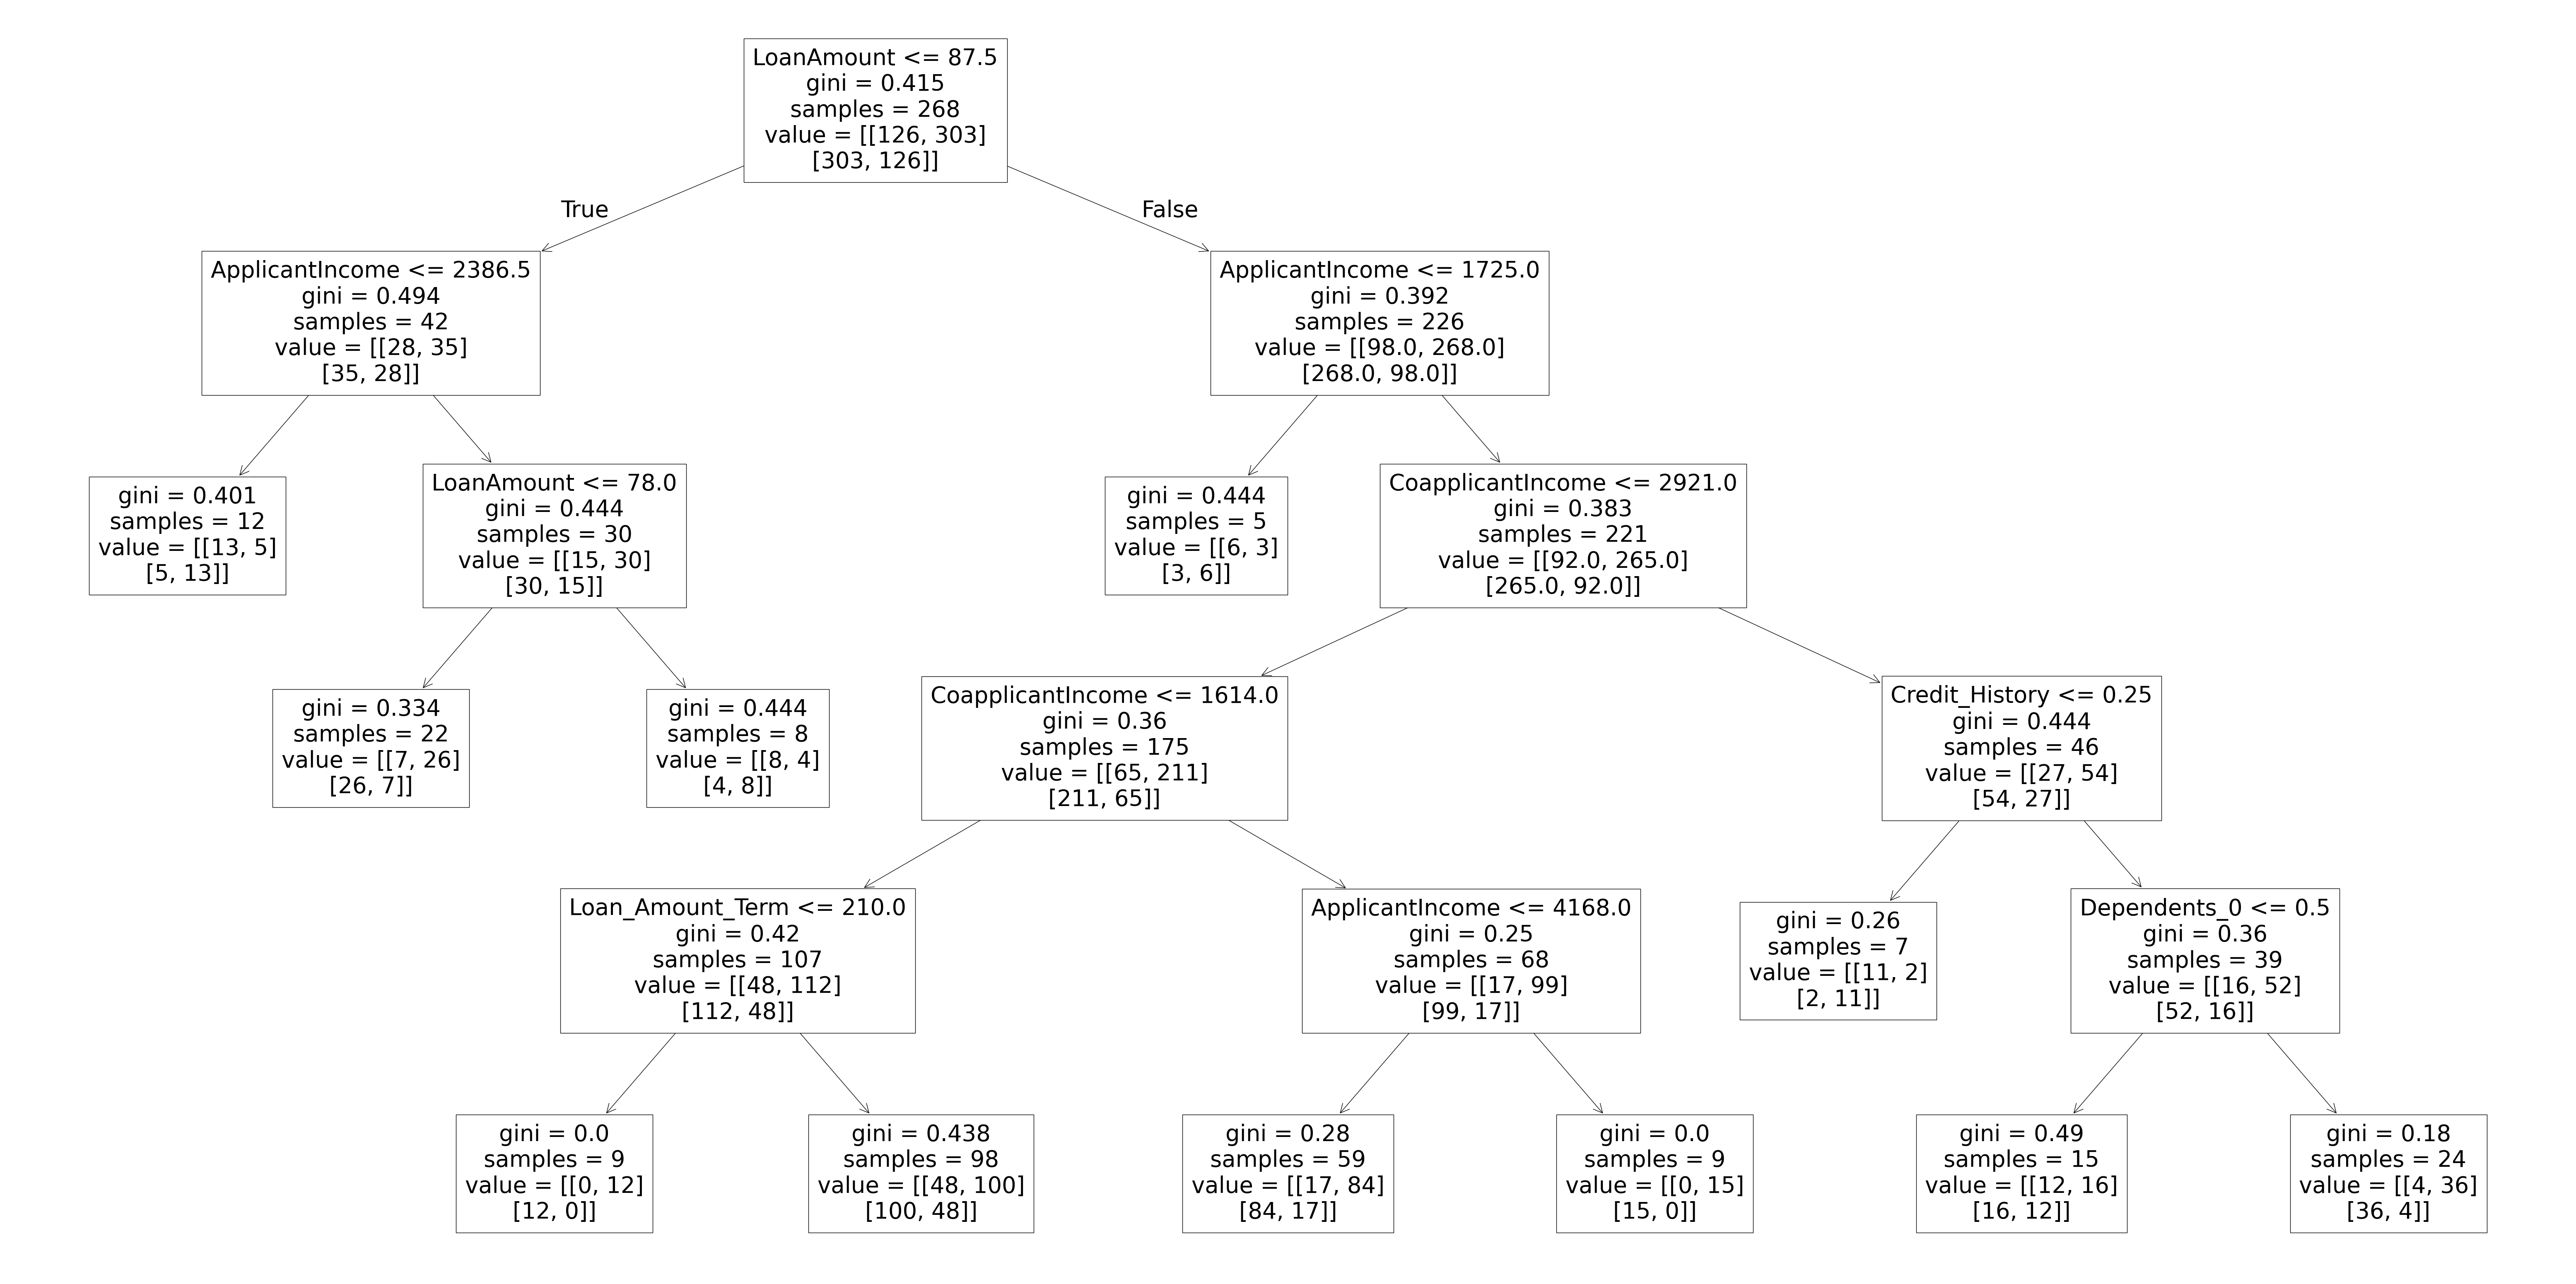

In [448]:
from sklearn.tree import plot_tree

rf_best_model= RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=25, n_estimators=25)
rf_tree=rf_best_model.fit(x_train,y_train)

plt.figure(figsize=(80,40))
plot_tree(rf_tree.estimators_[7],feature_names =x.columns, class_names=['Loan','No Loan'])
plt.show()

In [458]:
imp_df = pd.DataFrame({
                        'Varname':x_train.columns,
                        'Imp': rf_tree.feature_importances_
})
imp_df.sort_values(by='Imp', ascending=False).head(10)

,Varname,Imp
4,Credit_History,0.406607
2,LoanAmount,0.107159
0,ApplicantIncome,0.087328
20,Total_Income,0.085087
18,Property_Area_Semiurban,0.051618
13,Education_Graduate,0.039505
1,CoapplicantIncome,0.031514
3,Loan_Amount_Term,0.026814
14,Education_Not Graduate,0.021334
16,Self_Employed_Yes,0.015945


## KNN

In [430]:
knn_best=search(KNeighborsClassifier(),{
                               'leaf_size':[2,3,5,7,10],
                                'n_neighbors':[20,25,30,35,40],
                                'weights':['uniform','distance'],
                                'metric':['euclidean','manhattan','minkowski']
                               })
knn_best

Fitting 4 folds for each of 270 candidates, totalling 1080 fits


(0.6946607822776047,
 KNeighborsClassifier(leaf_size=2, metric='euclidean', n_neighbors=25))

## NN

In [436]:
nn_best = search(MLPClassifier(),{
                                'hidden_layer_sizes':[(30,),(40,),(50,)],
                               'random_state':[29,30,31,32],
                                'alpha':[0.0001,0.001,0.01]
                               })
nn_best

Fitting 4 folds for each of 36 candidates, totalling 144 fits


(0.6946607822776047, MLPClassifier(hidden_layer_sizes=(40,), random_state=30))